# Quick Landscape of neural net workflows in Python

There are various packages for implementing NNs in python

In [1]:
from sklearn.neural_network import MLPClassifier

MLP stands for multi layer perceptron classifier

# Notes on parameters
__hidden_layer_sizes__ obvi

__activation__ standard options. 

__solver__
- [lbfgs](https://en.wikipedia.org/wiki/Limited-memory_BFGS) Brief recap: Newton's method fits a quadratic to the the current point and updates with the min of that quadratic which is $-f'/f''$. lbfgs is an approx of this method by finding a quasi inverse of the hessian of f (the $f''$ matrix)
- [sgd](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) stochastic gradient descent (update after each training example)
- [adam](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) adaptive moment estimation updates weights with a notion of momentum (to "not change directions too fast") and acceleration (so if it seems like we are making big changes we should slow down)

__alpha__ L2 penalty

__batch_size__ duh. lbfgs doesn't use

__learning_rate__ 
- constant duh
- invscaling decreases w/ t
- adaptive keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing but then starts dividing by 5

__learning_rate_init__ duh lbfgs doesn't use

... a bunch of others

## Let's practice on some actual data

In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
data = mnist.load_data()

In [9]:
(x_train, y_train), (x_test, y_test) = data

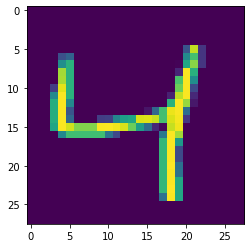

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[2])

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 18s 293us/sample - loss: 13.3157 - acc: 0.1736
Epoch 2/3
60000/60000 [==============================] - 17s 286us/sample - loss: 14.4143 - acc: 0.1057
Epoch 3/3
60000/60000 [==============================] - 17s 282us/sample - loss: 13.8926 - acc: 0.1381


In [14]:
x_train_norm = tf.keras.utils.normalize(x_train, axis=1)
x_test_norm = tf.keras.utils.normalize(x_test, axis=1)
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model1.fit(x_train_norm, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 18s 297us/sample - loss: 0.2586 - acc: 0.9249
Epoch 2/3
60000/60000 [==============================] - 11s 175us/sample - loss: 0.1055 - acc: 0.9671
Epoch 3/3
60000/60000 [==============================] - 17s 285us/sample - loss: 0.0725 - acc: 0.9771


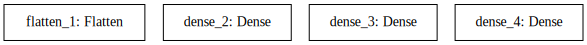

In [19]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [ ]:
history = model.fit(x_train, y_train, epochs=3)

In [24]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


In [28]:
model.

['loss', 'acc']


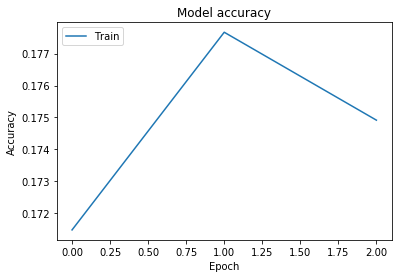

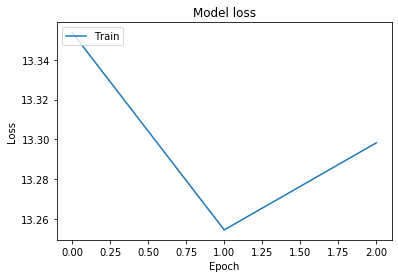

In [33]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Help on method compile in module tensorflow.python.keras.engine.training:

compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, distribute=None, **kwargs) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    Arguments:
        optimizer: String (name of optimizer) or optimizer instance.
            See `tf.keras.optimizers`.
        loss: String (name of objective function) or objective function.
            See `tf.losses`. If the model has multiple outputs, you can use a
            different loss on each output by passing a dictionary or a list of
            losses. The loss value that will be minimized by the model
            will then be the sum of all individual losses.
        metrics: List of metrics to be evaluated by the model
            during training and testing.
            Typically you will use `metrics=['accuracy']`.
     